In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import yaml
import pandas as pd
import seaborn as sns
import cmocean.cm as cmo
# Path to modules
sys.path.append('../modules')

# Import my modules
from plotter import draw_basemap, add_subregion_boxes, make_cmap
from markovchain import MarkovChain, transition_matrix

In [2]:
# Set up paths

path_to_data = '/home/nash/DATA/data/'                            # project data -- read only
path_to_out  = '/home/nash/DATA/repositories/AR_types/out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '/home/nash/DATA/repositories/AR_types/figs/'      # figures


In [4]:
def create_P_matrix(ceofid, neofs, nk, ssn):
    # open data
    out_path = path_to_out + ceofid + '/' + ssn + '/' + 'neof' + str(neofs) + '/k' + str(nk) + '/'
    filepath = out_path + 'AR-types_ALLDAYS.csv'
    df = pd.read_csv(filepath)

    # run with AR_CAT data
    t = df.AR_CAT.values.tolist()
    m = transition_matrix(t)
    for row in m: print(' '.join('{0:.2f}'.format(x) for x in row))

    P = np.array(m) # Transition matrix as array
    P = np.round(P, 2) # Round decimals to two places
    return P

In [5]:
ceofid = 'HUV500'
neofs = 2 # choose number of eofs
nk = 3 # choose number of clusters

P1 = create_P_matrix(ceofid, neofs, nk, 'djf')
P2 = create_P_matrix(ceofid, neofs, nk, 'mam')
P3 = create_P_matrix(ceofid, neofs, nk, 'djfmam')

0.94 0.02 0.02 0.03
0.59 0.33 0.08 0.00
0.62 0.00 0.32 0.06
0.46 0.09 0.01 0.44
0.92 0.03 0.02 0.03
0.56 0.36 0.07 0.01
0.55 0.02 0.40 0.02
0.58 0.04 0.01 0.36


/home/nash/DATA/repositories/AR_types/figs/markov_chain_heatmap.png


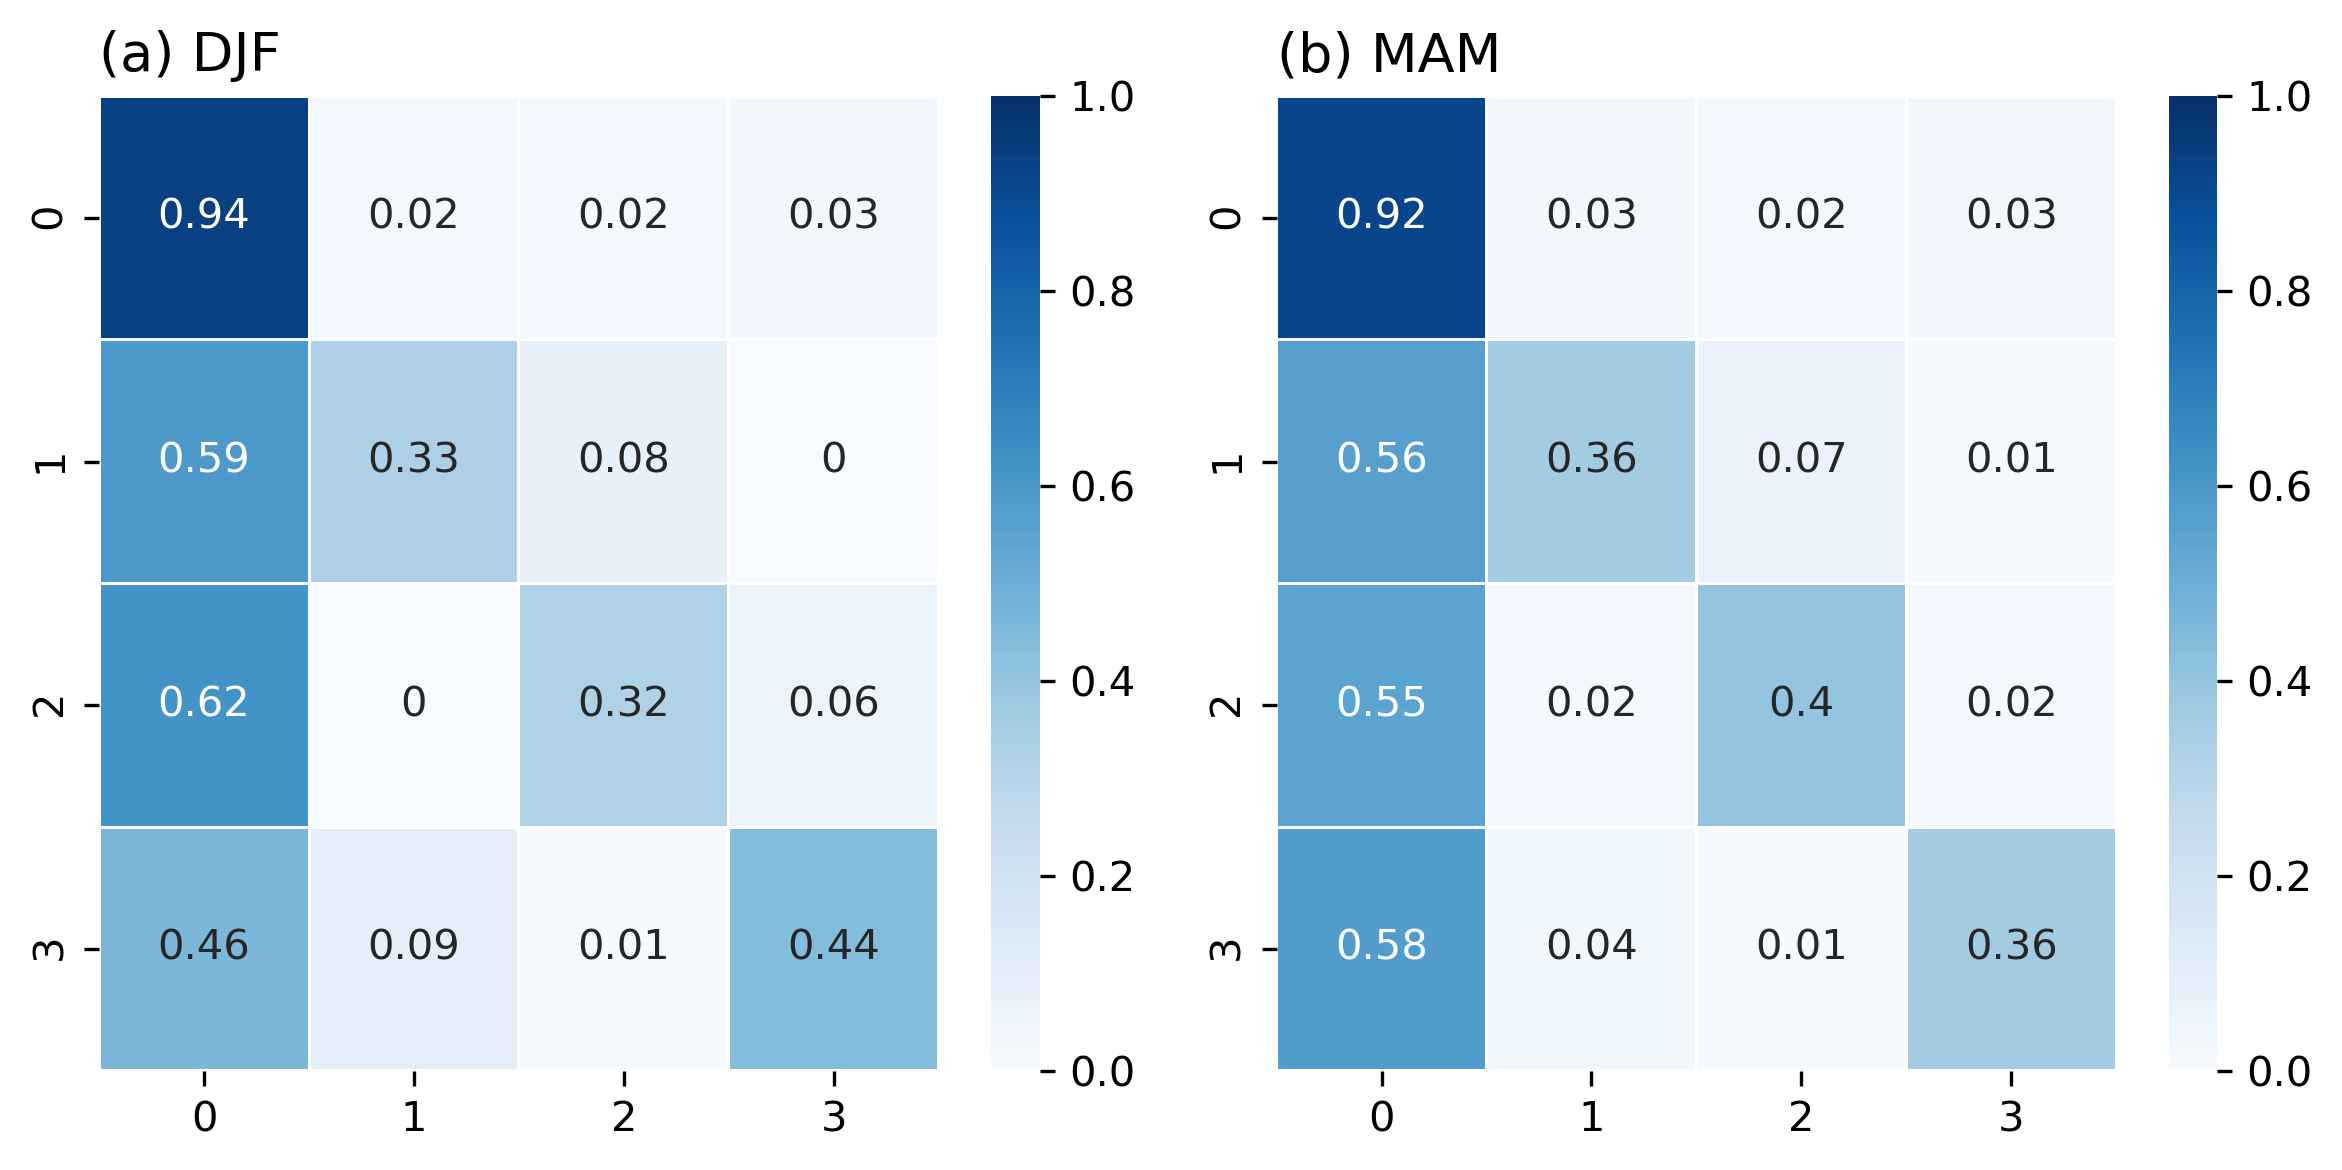

In [7]:
fname = path_to_figs + 'figS5_transition_heatmap'
fmt = 'png'

plt_labels = ['(a) DJF', '(b) MAM' '(c) DJFMAM']
P = [P1, P2, P3]
fig = plt.figure()
fig.set_size_inches((12.,4.))
fig.dpi = 300
nrows = 1
ncols = 3
nplots = nrows*ncols

cmap = "YlGnBu"
cmap = "Blues"
for i in np.arange(nplots):
    ax = plt.subplot(nrows, ncols, i+1)
    g = sns.heatmap(P[i], vmin=0, vmax=1, annot=True, linewidths=.5, cmap=cmap)
    plt.title(plt_labels[i], fontsize=13, loc='left')

plt.tight_layout()
# plt.show()

fig.savefig('%s.%s' %(fname, fmt), bbox_inches='tight', dpi=300)

plotFile = fname + '.png'
print(plotFile)

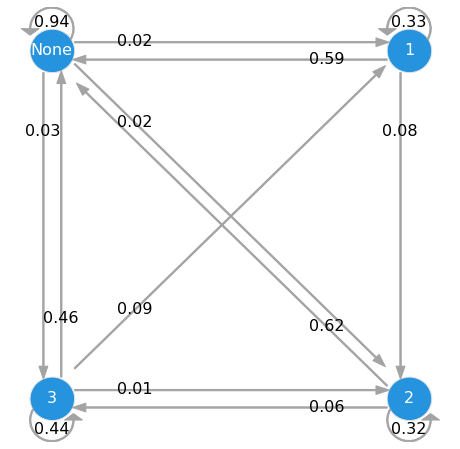

In [9]:
ssn='djf'
mc = MarkovChain(P1, ['None', '1', '2', '3'])
# save plot
filepath = path_to_figs + ssn + '_markov'+ '.png'
mc.draw(img_path=filepath)